<a href="https://colab.research.google.com/github/Temesgenasmamaw/InternCareer/blob/main/Task_2_Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [29]:

df=pd.read_csv('/content/drive/MyDrive/Machine Learning Intern/Task 2 Breast Cancer Wisconsin (Diagnostic)/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [32]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

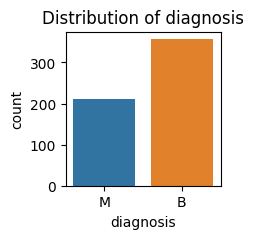

In [34]:
plt.figure(figsize=(2, 2))
sns.countplot(x = df['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()

In [35]:
#drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

### Correlation

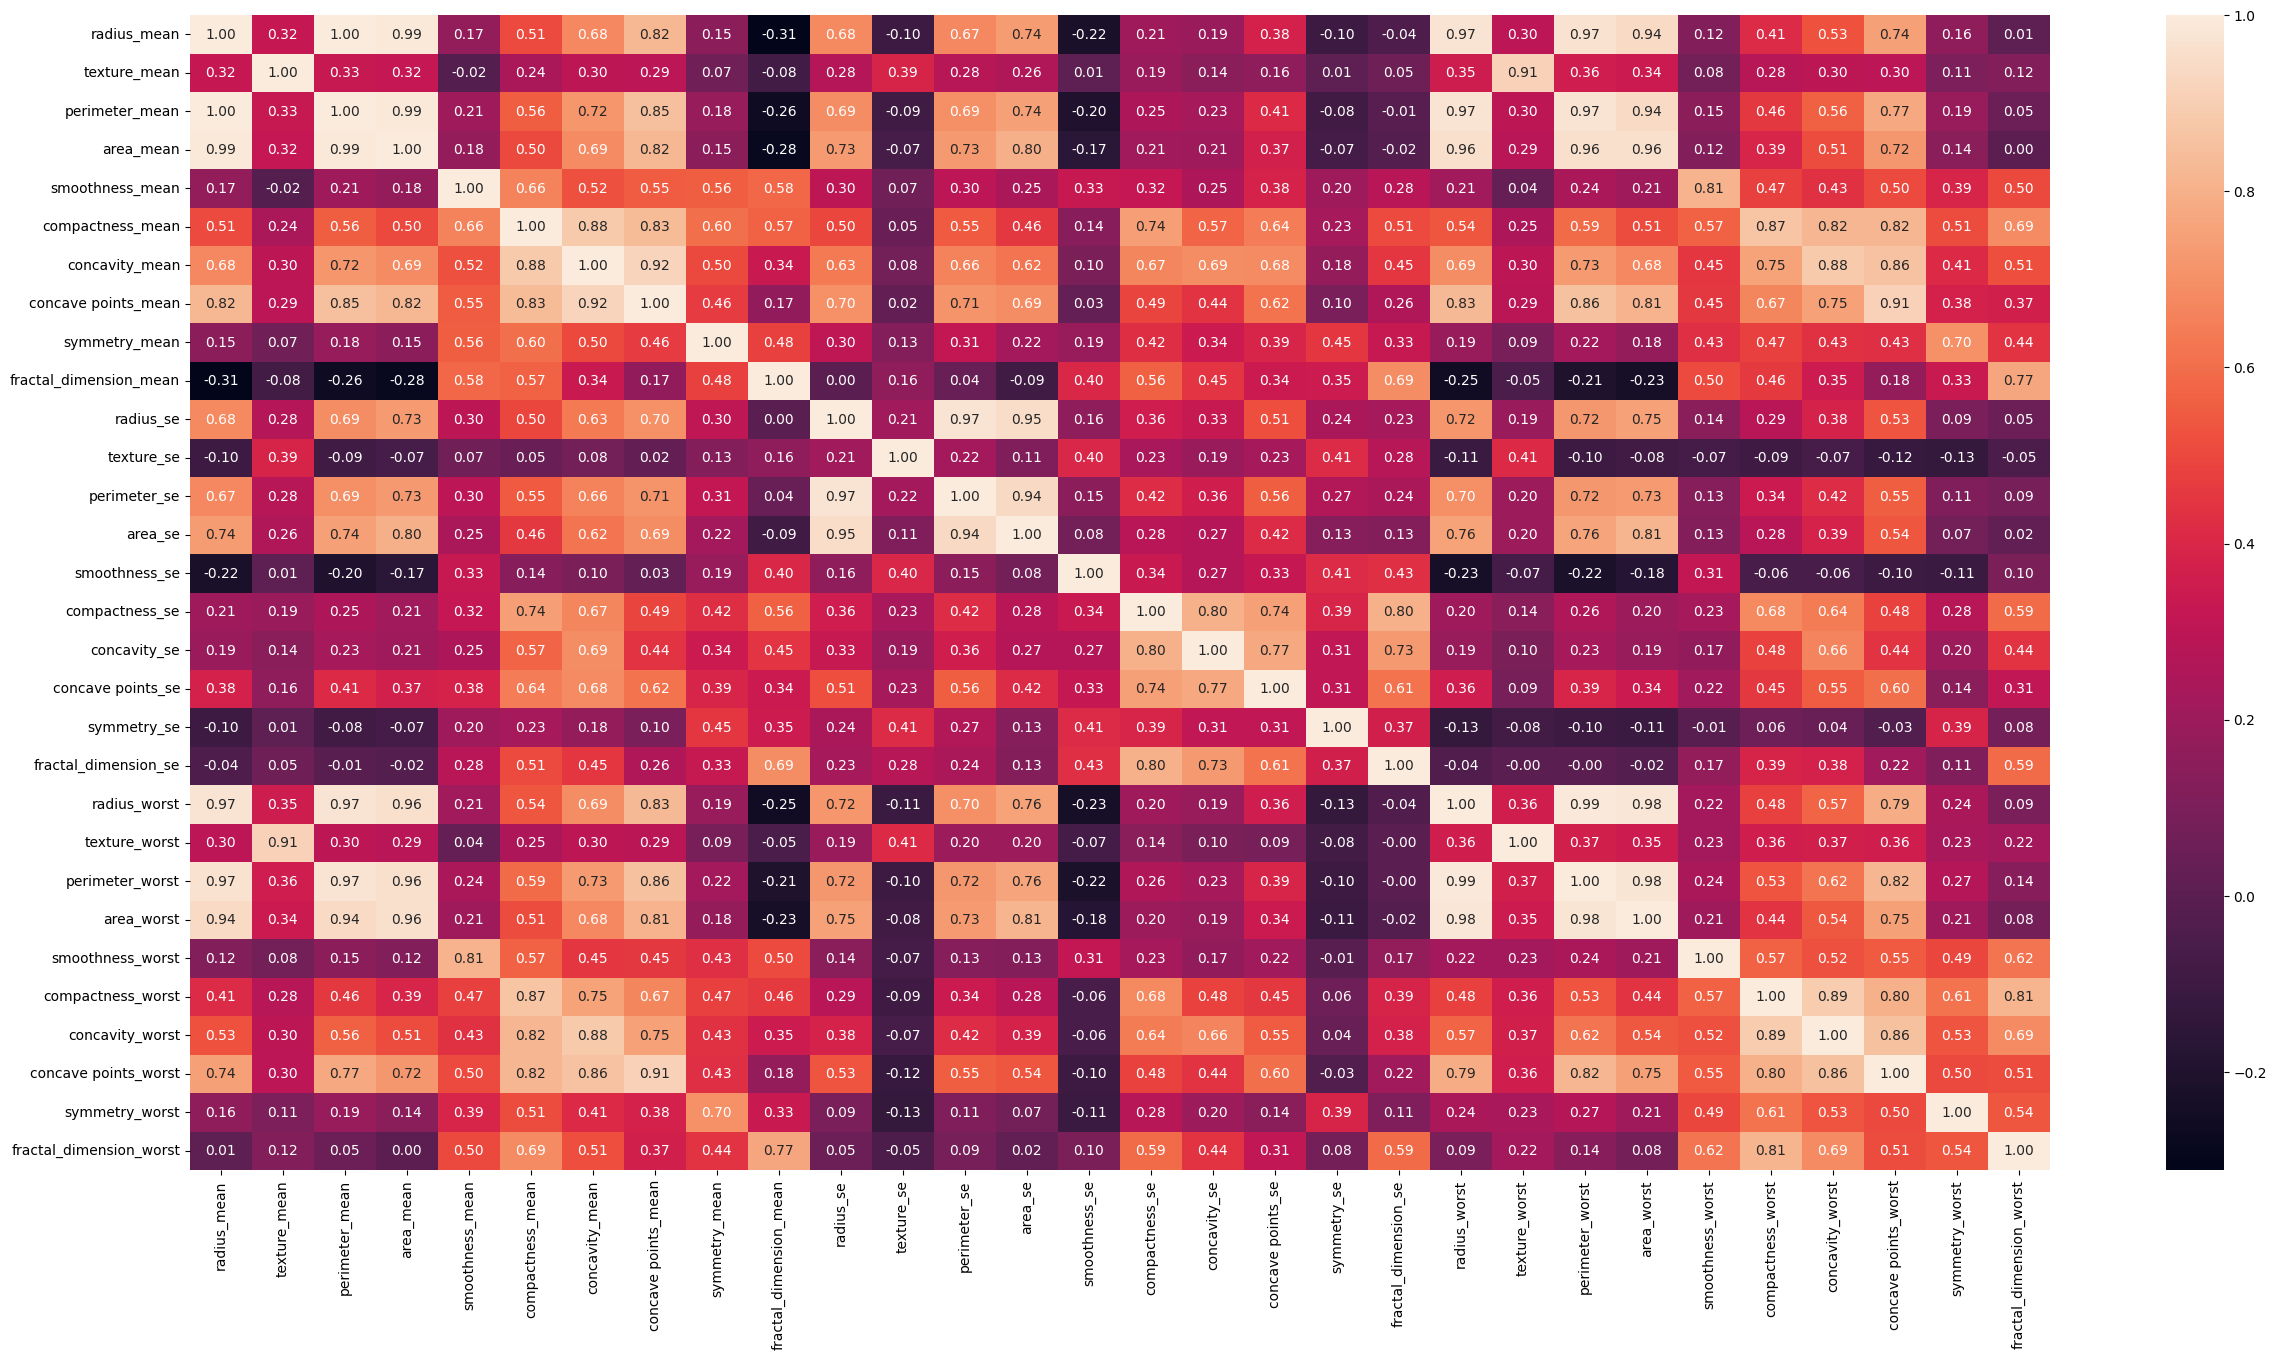

In [36]:
relationship = df.columns
plt.figure(figsize=(30, 15))
sns.heatmap(df[relationship[1:]].corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

from the above, the radius_mean column has a correlation of 1 & 0.99 with perimeter_mean & area_mean columns, respectively.so, we should only pick one of the three columns.

Another place where multicollinearity is, the radius_mean column has a correlation with the radius_worst column.

Also, there is multicollinearity between compactness, concavity & concave points. So we can choose just one out of these.

# feature selection and  Data preprocessing

### fix multicollinearity

In [37]:
# drop worest columns
cols=['radius_worst','texture_worst','perimeter_worst',
      'area_worst','smoothness_worst','compactness_worst',
      'concavity_worst','concave points_worst',
      'symmetry_worst','fractal_dimension_worst']
df=df.drop(cols,axis=1)

# drop columns related to the perimeter & area
cols=['perimeter_mean','perimeter_se',
      'area_mean','area_se']
df=df.drop(cols,axis=1)

#drop all columns related to 'Concavity','Concave points'
cols=['concavity_mean','concavity_se',
      'concave points_mean','concave points_se']
df=df.drop(cols,axis=1)

# remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

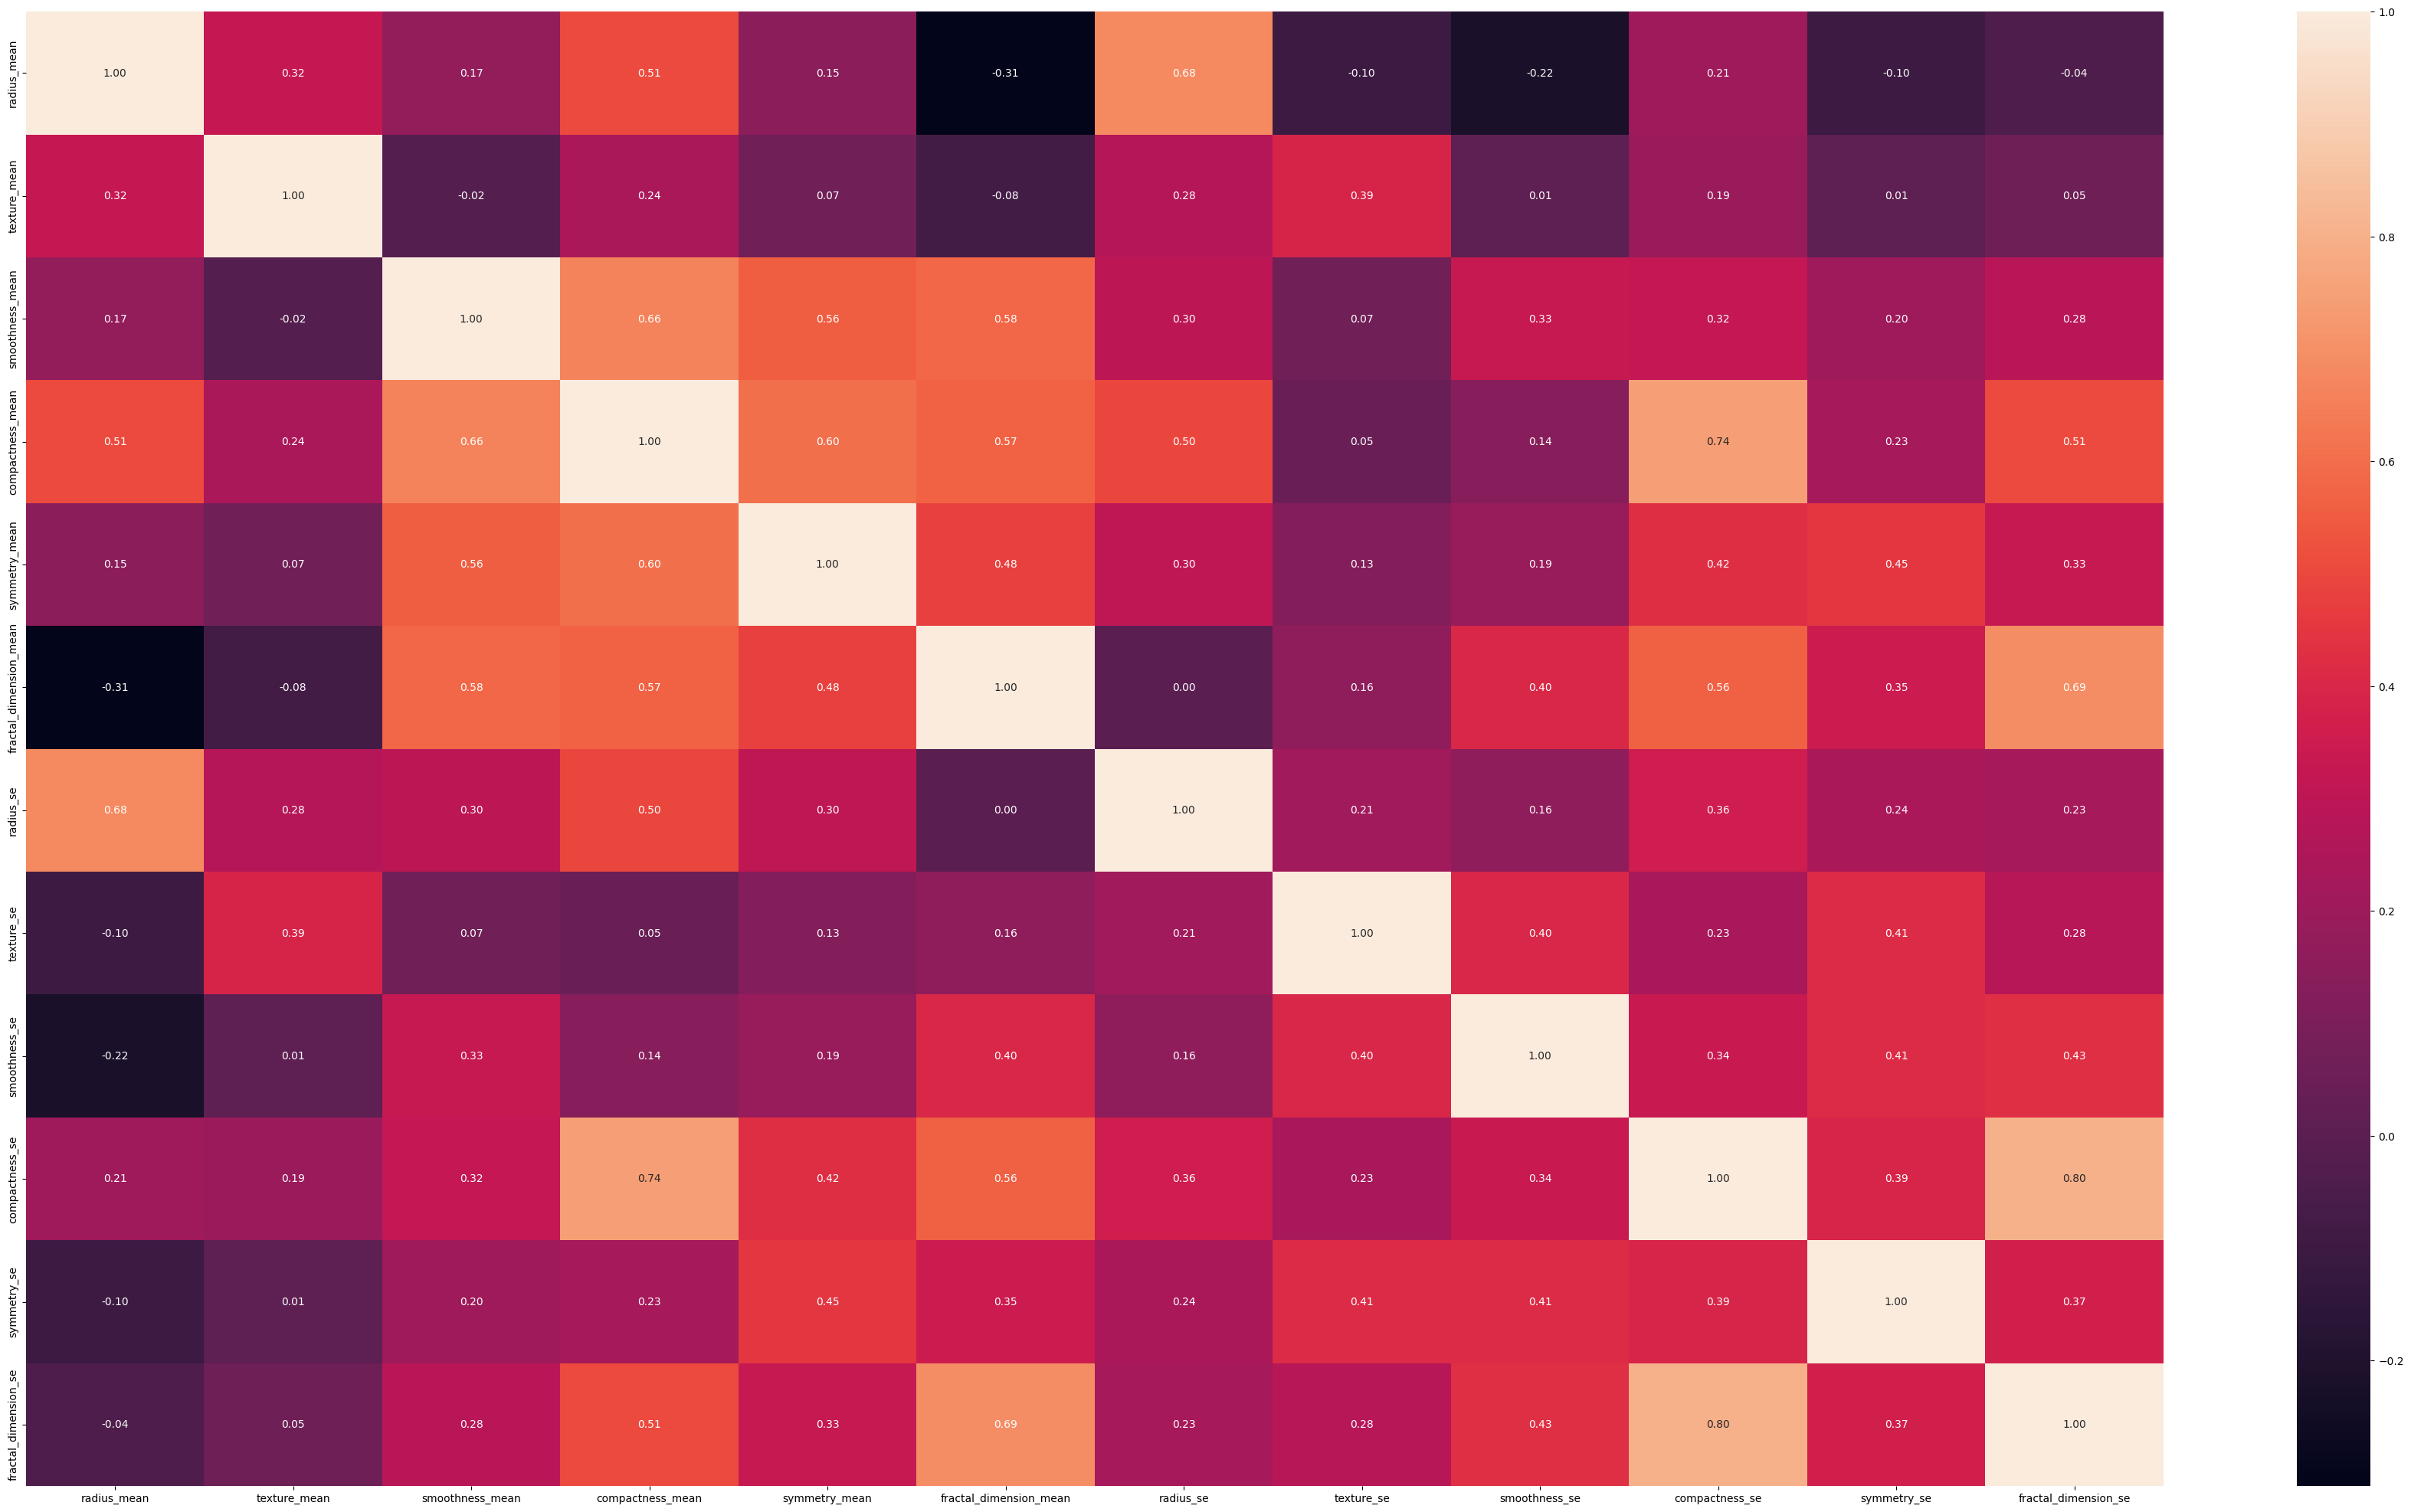

In [38]:
# Draw the heatmap again, with the new correlation matrix
relationship = df.columns
plt.figure(figsize=(45, 25))
sns.heatmap(df[relationship[1:]].corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [39]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

### Label enoder

In [40]:
# converting categorical Columns

df['diagnosis']=df['diagnosis'].replace({'B':0,'M':1})
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


### Model Building

In [41]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### without hyperparameter tuning

In [60]:
from sklearn.linear_model import LogisticRegression
classifiers = {
"Random Forest": RandomForestClassifier(random_state=42),
'Logistic Regression': LogisticRegression(random_state=42),
'SVC': SVC(),
'Wlleighbors': KNeighborsClassifier(),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'adatoost': AdaBoostClassifier (random_state=42)

}

# Train, evaluate, and select the best model
best_model = None
best_accuracy = 0

# Store accuracy scores and classification reports for all models
results = {}

for name, model in classifiers. items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    Classification_rep = classification_report(y_test, y_pred)

    results[name] = {'accuracy': accuracy, 'classification_report': Classification_rep}


    print(f"{name} Accuracy:{accuracy})")
    print(f"{name} Classification Report:\n{Classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")

Random Forest Accuracy:0.956140350877193)
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Logistic Regression Accuracy:0.956140350877193)
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVC Accuracy:0.956140350877193)
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
        

### hyperparameter tuning

In [23]:
from sklearn.model_selection import ShuffleSplit

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
def find_best_model_using_gridsearchcv(X,y):
    algos = {
   'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },

          'svm': {
            'model': SVC(),
            'params': {
                'C': [0.1,1,10,20,40],
                'kernel': ['rbf', 'linear'],
                'gamma':['scale','auto']
            }
        },
        'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,50,100,200]
        }
    },
    'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini', 'log_loss', 'entropy'],
                'splitter': ['best','random']
            },
            'max_depth':[None,10,20,30]
        },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    }
        ,
  'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
    },
          'adaboost': {
            'model': AdaBoostClassifier(estimator=DecisionTreeClassifier()),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1.0]
            }
        }
    }
    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train_scaled,y_train)

,model,best_score,best_params
0,logistic_regression,0.940659,{'C': 1}
1,svm,0.936264,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
2,random_forest,0.940659,{'n_estimators': 200}
3,decision_tree,0.916484,"{'criterion': 'gini', 'splitter': 'best'}"
4,naive_bayes_gaussian,0.909890,{}
5,knn,0.934066,"{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}"
6,adaboost,0.920879,"{'learning_rate': 0.01, 'n_estimators': 50}"


From the table select the one with best score,which is logistic regression

In [82]:
lg_model=LogisticRegression(C=1).fit(X_train_scaled,y_train)
predicted=lg_model.predict(X_test_scaled)
score=accuracy_score(y_test,predicted)
score1=lg_model.score(X_test_scaled,y_test)
print('accuracy_score',score)

accuracy_score 0.956140350877193


### Classification report

In [83]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion matrix

[[68  3]
 [ 2 41]]


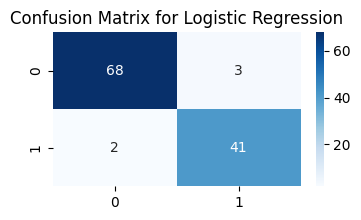

In [84]:
import sklearn.metrics
cm = sklearn.metrics.confusion_matrix(y_test, predicted)
print(cm)
plt.figure(figsize=(4, 2))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predicted), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Save the model for deployment

In [87]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
lg_pkl_filename = '/content/drive/MyDrive/Machine Learning Intern/Task 2 Breast Cancer Wisconsin (Diagnostic)/myModel_04.pkl'
# Open the file to save as pkl file
lg_Model_pkl = open(lg_pkl_filename, 'wb')
pickle.dump(lg_model, lg_Model_pkl)
# Close the pickle instances
lg_Model_pkl.close()